In [1]:
# ### 0. Packages Installation!
#!pip install selenium
# !pip install parsel
# **Install chrome**
# !apt-get update # to update ubuntu to correctly run apt install
# !apt install -y chromium-chromedriver

## 1. Opening Linkedin with `webdriver.Chrome()`
#### 1.1. Set-up your `web-driver`

In [2]:
import time 
from selenium import webdriver
from IPython.core.display import Image, display
from selenium.webdriver.common.keys import Keys
driver = r'C:\Users\Admin\Downloads\chromedriver_win32\chromedriver' # should be replaced by the path to your chromedriver
driver = webdriver.Chrome(driver)
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="059a745e5a6b540c7955670315c544bd")>


A website of `Chrome` will be displayed as follow.

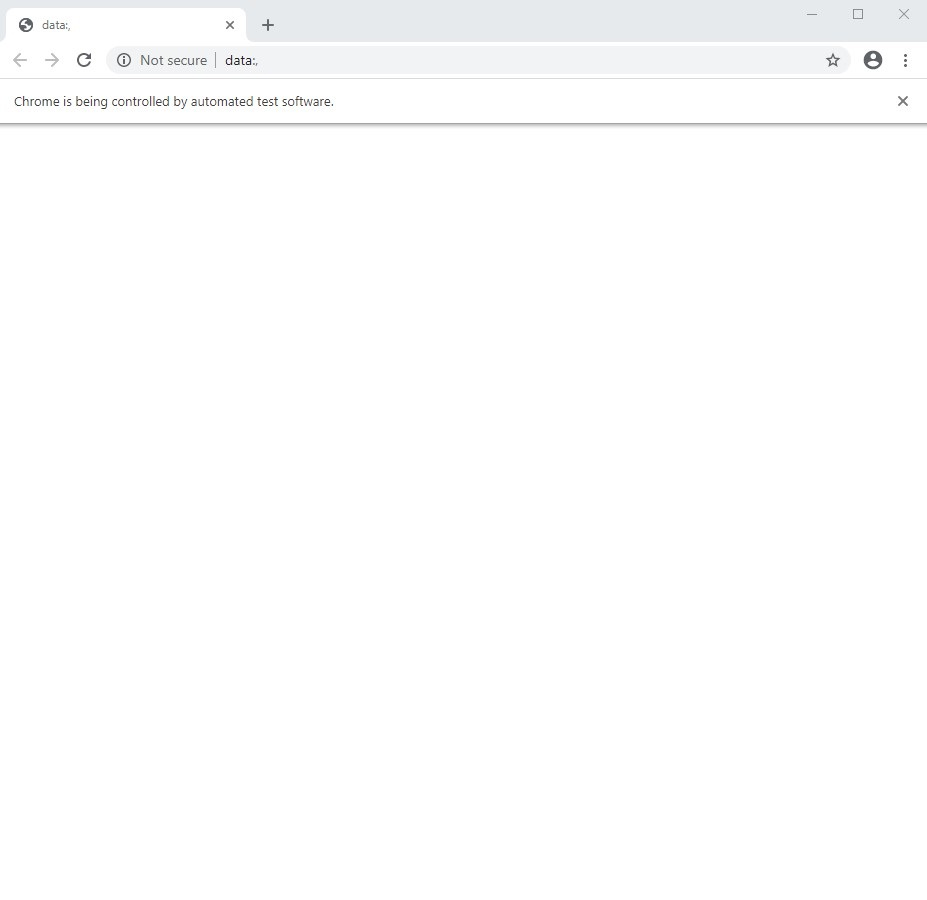

In [3]:
driver.save_screenshot("screen_shot_1.png")
Image('screen_shot_1.png')  

#### Checking the current-version.

In [4]:
#print(webdriver.__version__)
print('3.14.1')

3.14.1


### Now, access your Linkedin-account.

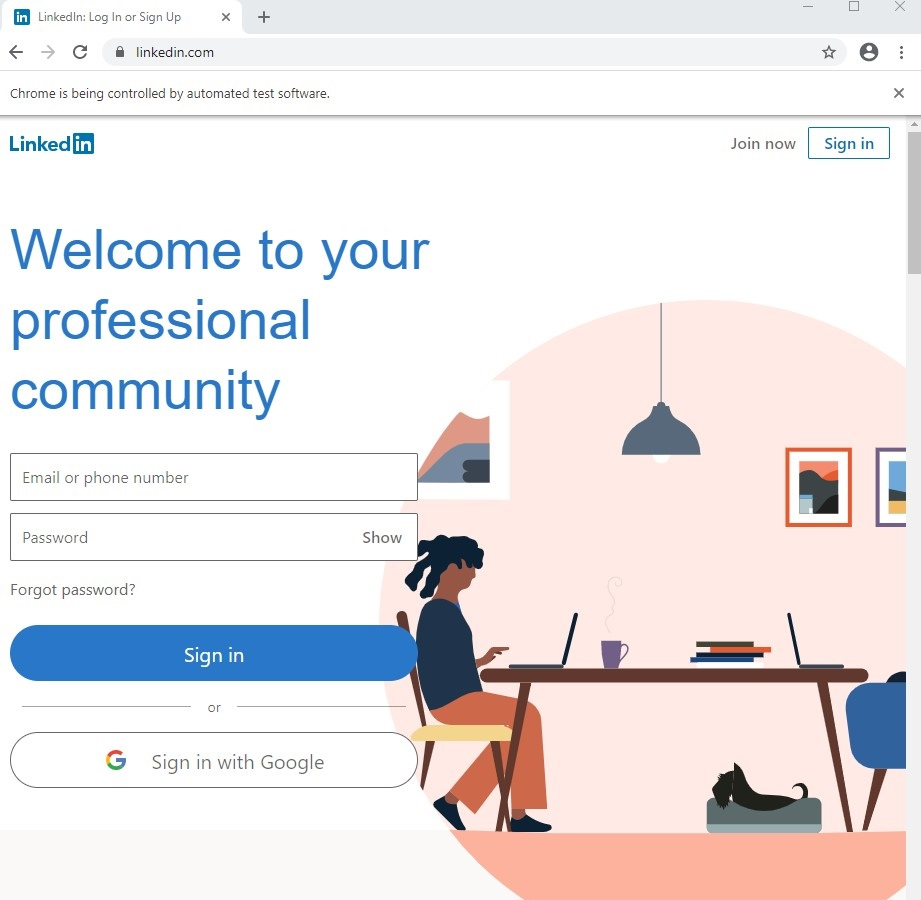

In [5]:
driver.get('https://www.linkedin.com')
driver.save_screenshot("screen_shot_2.png")
Image('screen_shot_2.png')  

#### Now, enter your `username`

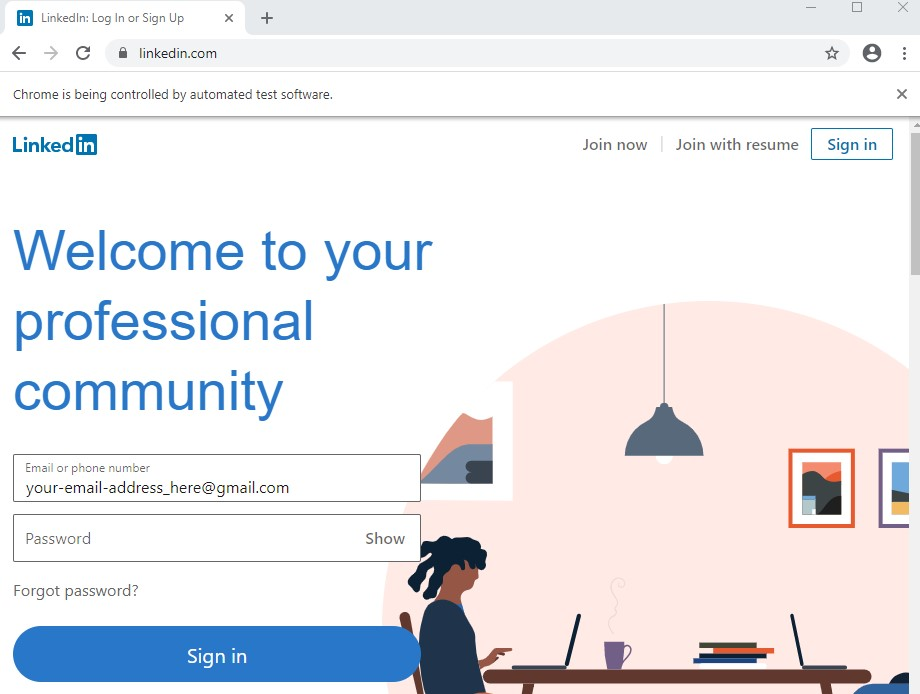

In [6]:
username = driver.find_element_by_name('session_key')
username.send_keys('your-email-address_here@gmail.com')
driver.save_screenshot("screen_shot_3.png")
Image('screen_shot_3.png')  

Then, your `password`

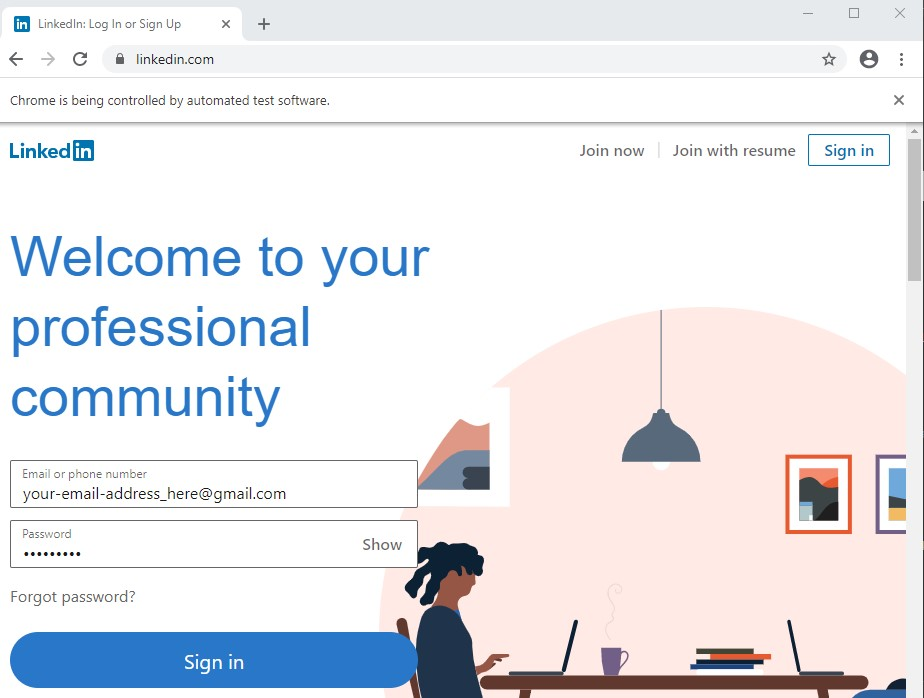

In [7]:
password = driver.find_element_by_name('session_password')
password.send_keys('your_password_here')
driver.save_screenshot("screen_shot_4.png")
Image('screen_shot_4.png')  

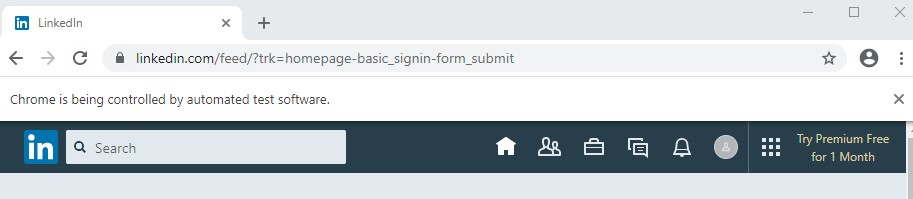

In [8]:
log_in_button = driver.find_element_by_class_name('sign-in-form__submit-button')
log_in_button.click()
driver.save_screenshot("screen_shot_5.png")
Image('screen_shot_5.png')  

## 2. Information-scraping
### 2.1 Using `full-xpath`
In the next session, we will discuss on scraping with using `find_element_by_name`, and now we will use the function `selector.xpath`

**Syntax.**

        xpath(query, namespaces=None, **kwargs) method of parsel.selector.Selector instance
            ============================================================================
            Find nodes matching the xpath ``query`` and return the result as a
            :class:`SelectorList` instance with all elements flattened. List
            elements implement :class:`Selector` interface too.
            ----------------------------------------------------------------------------------
            ``query`` is a string containing the XPATH query to apply.
            ----------------------------------------------------------------------------------
            ``namespaces`` is an optional ``prefix: namespace-uri`` mapping (dict)
            for additional prefixes to those registered with ``register_namespace(prefix, uri)``.
            Contrary to ``register_namespace()``, these prefixes are not
            saved for future calls.
            ----------------------------------------------------------------------------------
            Any additional named arguments can be used to pass values for XPath
            variables in the XPath expression, e.g.::

                selector.xpath('//a[href=$url]', url="http://www.example.com")

**Step 1.** Load the Linkedin-profile with a given `url`

<class 'selenium.webdriver.chrome.webdriver.WebDriver'>


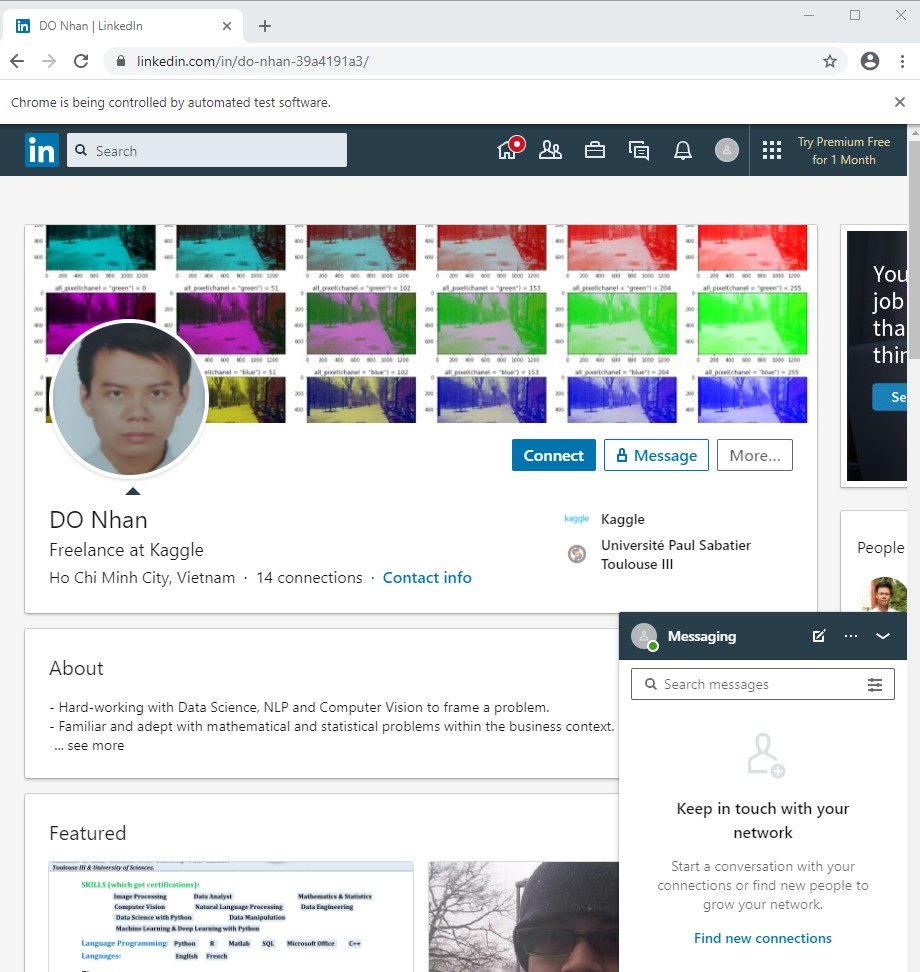

In [9]:
linkedin_url = 'https://www.linkedin.com/in/do-nhan-39a4191a3/'
driver.get(linkedin_url)
print(type(driver))

driver.save_screenshot("screen_shot.png")
Image('screen_shot.png')

**Step 2.** Inspect the element with `Ctrl + Shift + C` to find the `full-xpath` in the source-page

- For example, extract the `name` from Linkedin with `xpath`; then firstly you must choose the field contained the `name` then press `Ctrl  +  Shift  +  C`

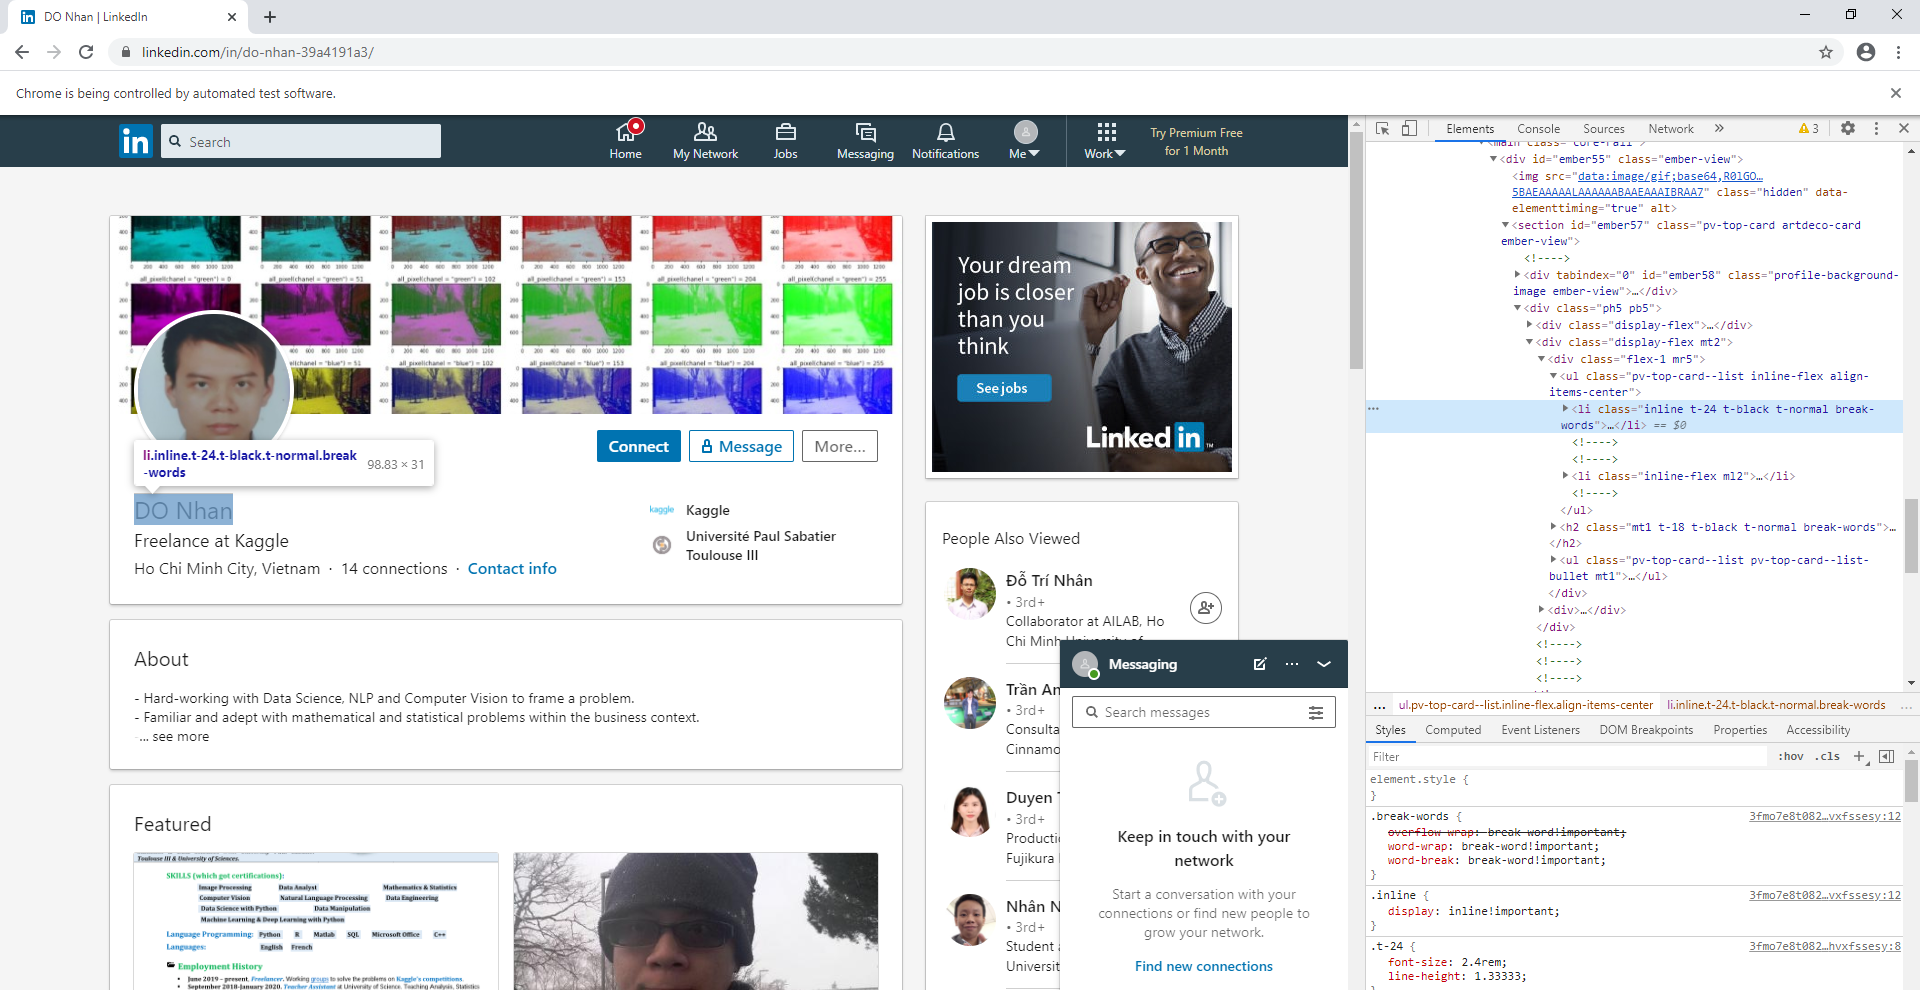

In [10]:
## Illustration

**Step 3.** Copy the `full Xpath`

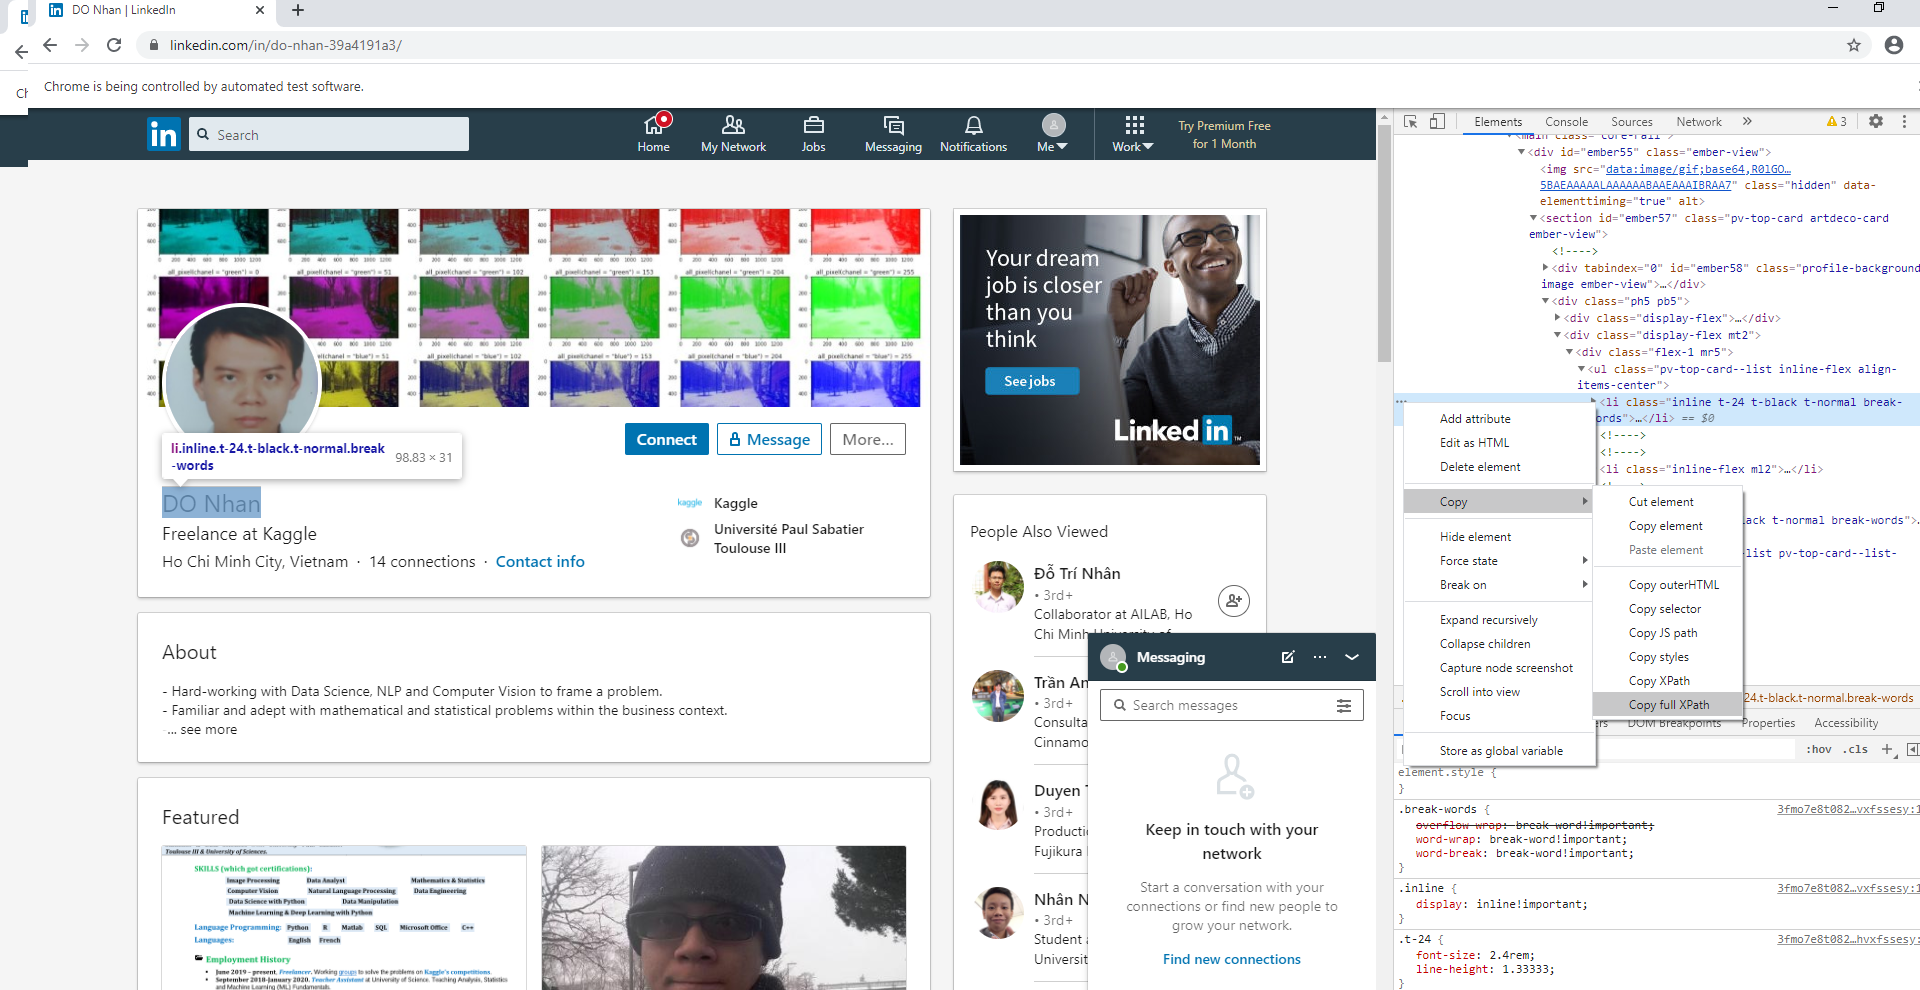

In [11]:
## Illustration

**Step 4.** Using `Selector` from `parsel` then extract the `text()` from the `full Xpath`

$\qquad \diamond$ **4a. Initialize `Selector`** with the `text` is obtained from the `page_source` of the `webdriver`.

In [12]:
sel = Selector(text=driver.page_source); 
print('sel = ', sel)
print(type(sel))

sel = <Selector xpath=None data='<htmllang="en" class="artdeco window...'>
type(sel): <class 'parsel.selector.Selector'>


$\qquad \diamond$ **4b. Use the `full_xpath` of the object (here is `name`) to scrap data.**

In [13]:
name_full_xpath = "/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[1]/ul[1]/li[1]/text()"
scrap_name_fxpath = sel.xpath(name_full_xpath)
print('name_full_xpath = %s, scrap_name_fxpath :\n %s',%(name_full_xpath, scrap_name_fxpath))

scrap_name_fxpath:
 [<Selector xpath='/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[1]/ul[1]/li[1]/text()' data='
            DO Nhan
          '>]


**Step 5.** Use `extract_first()` to get the `name`

In [14]:
print(scrap_name_fxpath.extract_first())


            DO Nhan
          


### 2.2. Using `element` from `inspect element`.
**Step 1. Find the `element`.**

For example, we can find the element as following searching:

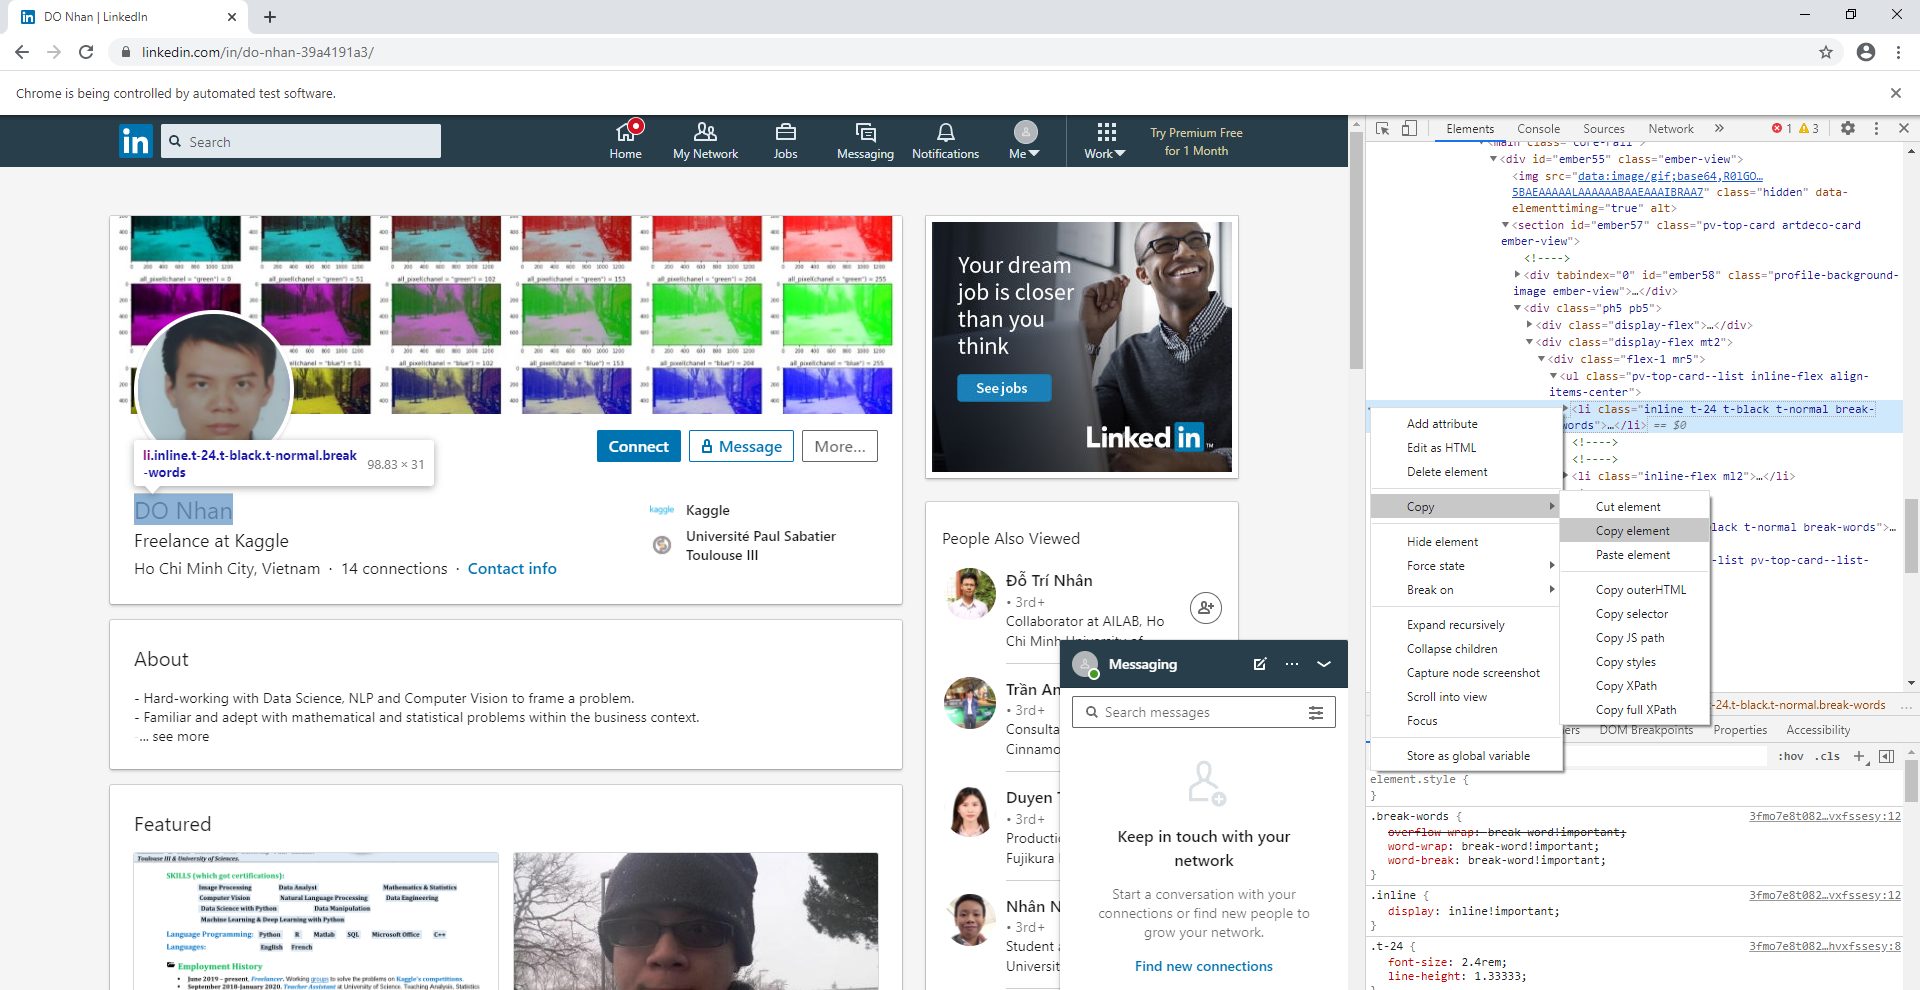

In [15]:
## Illustration

**Step 2. Copy the `element` to the `selector`**

Syntax:

            selector.xpath("//*[starts-with(@class, object_element]")

In [16]:
object_element = "inline t-24 t-black t-normal break-words"
xpath_element = '//*[starts-with(@class, "%s" )]'%(object_element)
print('xpath_element :', xpath_element)
print(sel.xpath(xpath_element))   

xpath_element : //*[starts-with(@class, "inline t-24 t-black t-normal break-words" )]
sel.xpath(xpath_element): 
 [<Selector xpath='//*[starts-with(@class,"inline t-24 t-black t-normal break-words" )]' data='<li class="inline t-24 t-black t-norm...'>]


**Step 3.** Extract the text and object

In [17]:
print("select text: \n", sel.xpath(xpath_element) + '/text()')
print("extract text: \n", (sel.xpath(xpath_element) + '/text()').extract_first())

select text : 
 [<Selector xpath='//*[starts-with(@class,"inline t-24 t-black t-normal break-words")]/text()' data='
            DO Nhan
          '>]
extract text: 

            DO Nhan



## 3. The problems of scraping `Big-data`
Now, I will give you a list of `url-link` and you will scrap the information from these links.

What happen if you can not access the web-page at any certain iterations in loop? Suppose that, at each 10 iterations, you must skip about 5-10 seconds to the next iteration?

Before `wrapping-up all together`, I will take a short-example as following.

In [18]:
for k in range(20):
    t0 = time.time()                         ## index in your iteration
    import cv2
    import numpy as np
    fk = np.zeros((500 + k*20, 500+ k*10, 3), dtype = np.uint8)       ## function defined w.r.t the index
    fk[:, :, 0] = 255
    fk[:, :, 2] = 128
    fk = cv2.cvtColor(fk, cv2.COLOR_BGR2HSV)
    fk[:,:,1] = 164
    print('k = %s, fk_shape = %s, time_k = %s'%(k, fk.shape, time.time() - t0));  ## measure the time-out of function in each step
    if (k+1)%10 == 0:
        t0 = time.time()
        time.sleep(5)
        print('stoping_time = ',time.time() - t0)
    elif k==20:
        print('Done! complete the short-testing!')

k = 0, fk_shape = (500, 500, 3), time_k = 0.30866217613220215
k = 1, fk_shape = (520, 510, 3), time_k = 0.0010058879852294922
k = 2, fk_shape = (540, 520, 3), time_k = 0.0010004043579101562
k = 3, fk_shape = (560, 530, 3), time_k = 0.0011773109436035156
k = 4, fk_shape = (580, 540, 3), time_k = 0.0012671947479248047
k = 5, fk_shape = (600, 550, 3), time_k = 0.0026035308837890625
k = 6, fk_shape = (620, 560, 3), time_k = 0.0012781620025634766
k = 7, fk_shape = (640, 570, 3), time_k = 0.0015587806701660156
k = 8, fk_shape = (660, 580, 3), time_k = 0.0014617443084716797
k = 9, fk_shape = (680, 590, 3), time_k = 0.0013768672943115234
stoping_time =  5.002357006072998
k = 10, fk_shape = (700, 600, 3), time_k = 0.0019805431365966797
k = 11, fk_shape = (720, 610, 3), time_k = 0.002537965774536133
k = 12, fk_shape = (740, 620, 3), time_k = 0.002786397933959961
k = 13, fk_shape = (760, 630, 3), time_k = 0.0029439926147460938
k = 14, fk_shape = (780, 640, 3), time_k = 0.002758026123046875
k = 15

## 4. Wrapping-up together: scraping a list of links
Firstly, loading the `csv.file` contained `url-link`

In [19]:
import pandas as pd

pd.read_csv('my_url_links')

,link
0,https:://www.linkedin.com/in/do-nhan-39a4191a3/
1,https://uk.linkedin.com/in/thornbeck
2,https://www.linkedin.com/in/brandon-foxworth-7...
3,https://www.linkedin.com/in/steve-benckenstein/
4,https://www.linkedin.com/in/minh-hieu-do-82175...
5,https://uk.linkedin.com/in/pauljgarner
6,https://www.linkedin.com/in/lacy-judd-ba845273/
7,https://www.linkedin.com/in/daniel-reyes-367b6...
8,https://www.linkedin.com/in/thoa-thieu-294252135/
9,https://uk.linkedin.com/in/eastwoodalex


### 4.1. Using `full_xpath`
**Step 1,** Initialize the list contains the information

In [20]:
names = []
jobs = []
company = []
education = []
location = []
school = []

len(df), len(df.index), len(df.link)

(23, 23, 23)

**Step 2. Find the `full_xpath` for the given objects**

In [21]:
T0 = time.time()   ## use to measure total-time
## attaching scrap-data
for k in range(len(df)):
    t0 = time.time()
    path = df['link'][k]
    name = full_names[k]
    sec = seconds[k]
    driver.get(path)
    sel = Selector(text=driver.page_source)     
    name = sel.xpath("/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[1]/ul[1]/li[1]/text()").extract_first()
    names.append(name)
    jobs.append(  sel.xpath("/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[1]/h2/text()").extract_first() )
    company.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[2]/ul/li[1]/a/span/text()').extract_first())
    education.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[2]/div[5]/span/div/section/div[2]/section/ul/li[1]/div/div/a/div[2]/div/p[1]/span[2]/text()').extract_first())
    location.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[1]/ul[2]/li[1]/text()').extract_first())
    school.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[2]/div[5]/span/div/section/div[2]/section/ul/li[1]/div/div/a/div[2]/div/h3/text()').extract_first())
    print("step = %s, profile_name = %s, appending complete after %s (seconds) "%(k, name, sec))  ## xoa bien sec
                                                                                  #time.time() - t0))
    if (k+1) % 10 == 0:
        t0 = time.time()
        time.sleep(10)
        print('stoping_time = ',time.time() - t0)
print('Attaching progress : Completed!!! \t total url_links = %s, total_time = %s (seconds)'%(len(links),
                                                                                              time.time() - T0))

step = 0, profile_name = 
		DO Nhan 
, appending complete after 6.373023748397827 (seconds) 
step = 1, profile_name = 
		Thomas Hornbeck 
, appending complete after 4.384164333343506 (seconds) 
step = 2, profile_name = 
		Brandon Foxworth 
, appending complete after 2.2437267303466797 (seconds) 
step = 3, profile_name = 
		Steve Benckenstein 
, appending complete after 2.9553449153900146 (seconds) 
step = 4, profile_name = 
		Minh-Hieu Do 
, appending complete after 2.186629295349121 (seconds) 
step = 5, profile_name = 
		Paul Garner 
, appending complete after 2.9623892307281494 (seconds) 
step = 6, profile_name = 
		Lacy Judd 
, appending complete after 2.330589532852173 (seconds) 
step = 7, profile_name = 
		Daniel Reyes 
, appending complete after 2.4813473224639893 (seconds) 
step = 8, profile_name = 
		Thoa Thieu 
, appending complete after 2.879303216934204 (seconds) 
step = 9, profile_name = 
		Alex Eastwood 
, appending complete after 2.2608370780944824 (seconds) 
stoping_time

### 4.2. Using `element`

In [22]:
names = []
jobs = []
company = []
education = []
location = []
school = []
majors = []

T0 = time.time()
for k in range(len(df)):
    path = links[k]
    driver.get(path)
    sel = Selector(text=driver.page_source)     
    names.append(  sel.xpath('//*[starts-with(@class, "inline t-24 t-black t-normal break-words" )]/text()').extract_first() )
    jobs.append(sel.xpath('//*[starts-with(@class, "mt1 t-18 t-black t-normal break-words")]/text()').extract_first())
    location.append(sel.xpath('//*[starts-with(@class,  "t-16 t-black t-normal inline-block")]/text()').extract_first())
    education.append(sel.xpath('//*[starts-with(@class, "pv-entity__comma-item")]/text()').extract_first())
    school.append(sel.xpath('//*[starts-with(@class,  "pv-entity__school-name t-16 t-black t-bold")]/text()').extract_first())
    company.append(sel.xpath('//*[starts-with(@class,  "pv-entity__secondary-title t-14 t-black t-normal")]/text()').extract_first())
    if (k+1) % 5 == 0:
        t0 = time.time()
        time.sleep(10)
print('Attaching progress : Completed!!! \t total url_links = %s, total_time = %s (seconds)'%(len(links),
                                                                                               time.time() - T0))

Attaching progress : Completed!!! 	 total url_links = 23, total_time = 145 (seconds)


## 5. Save to csv
### 5.1. Text-processing, viewing & storing the final result of `full_xpath`

In [23]:
import pandas as pd
links = df['link']
df_full_xpath = pd.DataFrame({'name': names, 
                               'job title': jobs, 
                               'company': company, 
                               'education': education, 
                               'school': school, 
                               'location': location, 
                               'url': links}) 

df_full_xpath.head()

,name,job title,company,education,school,location,url
0,\n DO Nhan\n,\n Freelance at Kaggle\n,Kaggle\n\n,NaN,NaN,"\n Ho Chi Minh City, Vietnam\n ...",https://www.linkedin.com/in/do-nhan-39a4191a3/
1,\n Thomas Hornbeck\n,\n Co-Founder and CTO at Distynct\n...,Distynct \n\n,NaN,NaN,"\n Ames, Iowa, United States\n ...",https://uk.linkedin.com/in/thornbeck
2,\n Brandon Foxworth\n,\n Chef\n,NaN,NaN,NaN,"\n Dallas, Texas, United States\n...",https://www.linkedin.com/in/brandon-foxworth-7...
3,\n Steve Benckenstein\n,\n Empowering organizations to driv...,IBM\n\n,Bachelor of Business Administration - BBA,Texas A&M University,"\n Dallas, Texas, United States\n...",https://www.linkedin.com/in/steve-benckenstein/
4,\n Minh-Hieu Do\n,\n Postdoc at CEA-Saclay\n,CEA\n\n,Doctor of Philosophy (PhD),Université Paris 13,"\n Montigny-le-Bretonneux, Île-de...",https://www.linkedin.com/in/minh-hieu-do-82175...


**Text-processing**

In [24]:
def remove(x):
    if x == np.nan:
        x = None
    else:
        x = x.replace('\n\t', '').replace('\n', '')
    return x

for col in df_full_xpath.columns:
    df_full_xpath[col] = df_full_xpath[col].apply(lambda x : remove(x))
df_full_xpath

,name,job title,company,education,school,location,url
0,DO Nhan,Freelance at Kaggle,Kaggle,NaN,NaN,"Ho Chi Minh City, Vietnam ...",https://www.linkedin.com/in/do-nhan-39a4191a3/
1,Thomas Hornbeck,Co-Founder and CTO at Distynct ...,Distynct,NaN,NaN,"Ames, Iowa, United States ...",https://uk.linkedin.com/in/thornbeck
2,Brandon Foxworth,Chef,NaN,NaN,NaN,"Dallas, Texas, United States ...",https://www.linkedin.com/in/brandon-foxworth-7...
3,Steve Benckenstein,Empowering organizations to drive ...,IBM,Bachelor of Business Administration - BBA,Texas A&M University,"Dallas, Texas, United States ...",https://www.linkedin.com/in/steve-benckenstein/
4,Minh-Hieu Do,Postdoc at CEA-Saclay,CEA,Doctor of Philosophy (PhD),Université Paris 13,"Montigny-le-Bretonneux, Île-de-F...",https://www.linkedin.com/in/minh-hieu-do-82175...
5,Paul Garner,Freelance Python Developer at Depo...,Depop,NaN,NaN,"London, England, United Kingdom ...",https://uk.linkedin.com/in/pauljgarner
6,Lacy Judd,Sales Manager at Advance Building ...,"Advance Building Supply, Inc",Bachelor of Business Administration (B.B.A.),University of Central Missouri,"Sedalia, Missouri, United States...",https://www.linkedin.com/in/lacy-judd-ba845273/
7,Daniel Reyes,Senior Account Executive at UPS ...,UPS,Marketing with a sales concentration,Texas State University,"Dallas, Texas, United States ...",https://www.linkedin.com/in/daniel-reyes-367b6...
8,Thoa Thieu,Étudiant(e) (GSSI - Gran Sasso Sci...,Karlstad University,NaN,NaN,"L’Aquila, Abruzzi, Italy ...",https://www.linkedin.com/in/thoa-thieu-294252135/
9,Alex Eastwood,Software Engineering Manager at Gr...,Granicus,Master's Degree,UCL,"London, England, United Kingdom ...",https://uk.linkedin.com/in/eastwoodalex


### 5.2. Text-processing, viewing & storing the final result of `using elements`

In [25]:
df_element = pd.DataFrame({'name': names, 
                   'job title': jobs, 
                   'company': company, 
                   'education': education, 
                   'school': school, 
                   'location': location,
                   'url': links}) 
df_element.head()

,name,job title,company,education,school,location,url
0,\n DO Nhan\n,\n Freelance at Kaggle\n,\n Kaggle\n,Master's degree,Université Paul Sabatier Toulouse III,"\n Ho Chi Minh City, Vietnam\n ...",https://www.linkedin.com/in/do-nhan-39a4191a3/
1,\n Thomas Hornbeck\n,\n Co-Founder and CTO at Distynct\n...,\n Distynct \n,PhD ABD,University of Iowa,"\n Ames, Iowa, United States\n ...",https://uk.linkedin.com/in/thornbeck
2,\n Brandon Foxworth\n,\n Chef\n,\n \n,NaN,NaN,"\n Dallas, Texas, United States\n...",https://www.linkedin.com/in/brandon-foxworth-7...
3,\n Steve Benckenstein\n,\n Empowering organizations to driv...,\n Clarity Systems\n,Bachelor of Business Administration - BBA,Texas A&M University,"\n Dallas, Texas, United States\n...",https://www.linkedin.com/in/steve-benckenstein/
4,\n Minh-Hieu Do\n,\n Postdoc at CEA-Saclay\n,\n CEA\n,Doctor of Philosophy (PhD),Université Paris 13,"\n Montigny-le-Bretonneux, Île-de...",https://www.linkedin.com/in/minh-hieu-do-82175...


**Apply text-processing**

In [26]:
for col in df_element.columns:
    df_element[col] = df_element[col].apply(lambda x : remove(x))
df_element

,name,job title,company,education,school,location,url
0,DO Nhan,Freelance at Kaggle,Kaggle,Master's degree,Université Paul Sabatier Toulouse III,"Ho Chi Minh City, Vietnam ...",https://www.linkedin.com/in/do-nhan-39a4191a3/
1,Thomas Hornbeck,Co-Founder and CTO at Distynct ...,Distynct,PhD ABD,University of Iowa,"Ames, Iowa, United States ...",https://uk.linkedin.com/in/thornbeck
2,Brandon Foxworth,Chef,,NaN,NaN,"Dallas, Texas, United States ...",https://www.linkedin.com/in/brandon-foxworth-7...
3,Steve Benckenstein,Empowering organizations to drive ...,Clarity Systems,Bachelor of Business Administration - BBA,Texas A&M University,"Dallas, Texas, United States ...",https://www.linkedin.com/in/steve-benckenstein/
4,Minh-Hieu Do,Postdoc at CEA-Saclay,CEA,Doctor of Philosophy (PhD),Université Paris 13,"Montigny-le-Bretonneux, Île-de-F...",https://www.linkedin.com/in/minh-hieu-do-82175...
5,Paul Garner,Freelance Python Developer at Depo...,Depop,NaN,NaN,"London, England, United Kingdom ...",https://uk.linkedin.com/in/pauljgarner
6,Lacy Judd,Sales Manager at Advance Building ...,"Advance Building Supply, Inc",Bachelor of Business Administration (B.B.A.),University of Central Missouri,"Sedalia, Missouri, United States...",https://www.linkedin.com/in/lacy-judd-ba845273/
7,Daniel Reyes,Senior Account Executive at UPS ...,State Farm,Marketing with a sales concentration,Texas State University,"Dallas, Texas, United States ...",https://www.linkedin.com/in/daniel-reyes-367b6...
8,Thoa Thieu,Étudiant(e) (GSSI - Gran Sasso Sci...,NaN,NaN,NaN,"L’Aquila, Abruzzi, Italy ...",https://www.linkedin.com/in/thoa-thieu-294252135/
9,Alex Eastwood,Software Engineering Manager at Gr...,Granicus,Master's Degree,UCL,"London, England, United Kingdom ...",https://uk.linkedin.com/in/eastwoodalex
